In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Investigate $r_{180} < r_{200}$

We should find that $r_{180}>r_{200}$ always, but in practice we don't find that. It turns out the reason is that we sometimes don't allow for a large enough halo, and $r_{180}$ gets set to zero.

However, it turns out this doesn't matter! That's because for the 724 halos that we have data for, this is never an issue. To fix at a future date.

In [3]:
IDs, m, r, m200, r200, m180, r180 = np.loadtxt('./catalogs/catalog_iso138_200_180.txt',usecols=(0,4,5,6,7,8,9),unpack=True)

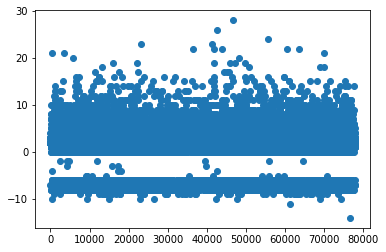

In [14]:
plt.scatter(x,r180-r200) # This should always be > 0 but isn't!

In [16]:
args = np.where(r180-r200<0)[0] #args where we have the problem.

In [18]:
IDs[args]

array([  4.53300027e+10,   5.26457045e+10,   6.76102890e+10, ...,
         1.29083967e+10,   1.32943544e+10,   4.27996694e+10])

In [26]:
args[0:4] # Made a list of IDs to look at and made a troubleshoot code on cori

array([ 18,  44,  63, 112])

In [27]:
r180[args] # All of the spots where we have issues we have a 0 here!

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [28]:
np.count_nonzero(r180[args])

0

In [31]:
ID_list = np.loadtxt('./4096z05/WHIM_data.txt',usecols=0)

In [32]:
args2 = [np.where(IDs==ID)[0][0] for ID in ID_list] # Is there an issue for the halos we actually use?

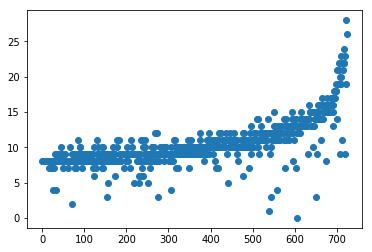

In [38]:
plt.scatter(np.arange(724),r180[args2]-r200[args2])

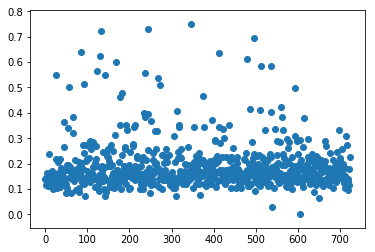

In [46]:
plt.scatter(np.arange(724),np.log10(m180[args2])-np.log10(m200[args2]))

In [56]:
# There is one weird 0 point at args2=605. Investigate.
p_i = args2[605]
print(r180[p_i]-r200[p_i])
print(r[p_i],r200[p_i],r180[p_i])
print(m[p_i],m200[p_i],m180[p_i])

0.0
17.0 15.0 15.0
4.20959e+12 5.03466466829e+12 5.03466466829e+12


# Check that mass sorting makes sense

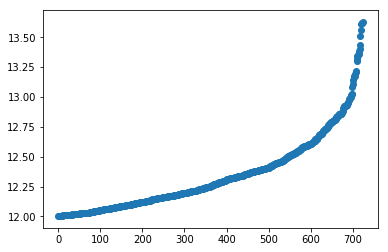

In [62]:
plt.scatter(np.arange(724),np.log10(m[args2]))

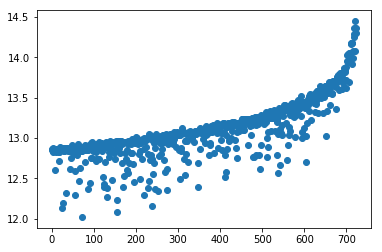

In [63]:
plt.scatter(np.arange(724),np.log10(m200[args2]))

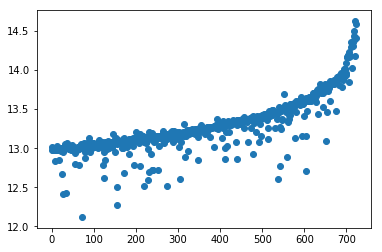

In [64]:
plt.scatter(np.arange(724),np.log10(m180[args2]))